In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


<Figure size 640x480 with 0 Axes>

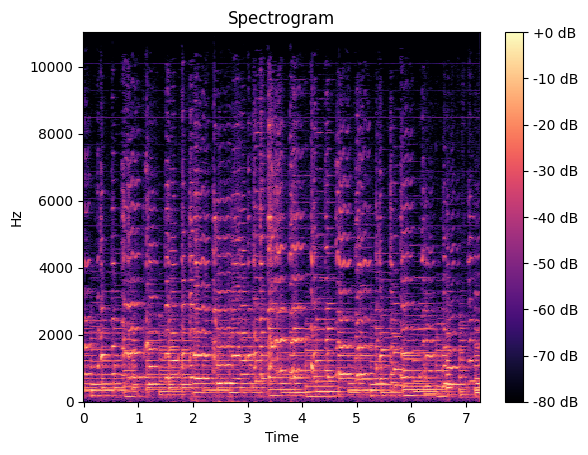

In [ ]:
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure()

# Object-oriented interface
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

In [ ]:
# mfcc

In [35]:
def mfcc_features(signal,sample_rate):
    return np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=20).T,axis=0).tolist()

In [2]:
def audio_preprocessing(data_dir, labels):
    df = pd.DataFrame()
    for label in labels:
        label_path = os.path.join(data_dir, label)
        for file in os.listdir(label_path):
            if file.endswith('.wav'):
                file_path = os.path.join(label_path, file)
                y, sr = librosa.load(file_path, sr=None)
                if y.size != 0:
                    df_new = pd.DataFrame(data=[[str(mfcc_features(y,sr)),label]], columns=['MFCC_Features', 'label'])
                    df = pd.concat([df, df_new], ignore_index=True)
        print(f"{label} features extracted")
    
    return df

In [26]:
labels = ['piano', 'violin']
label_dict = {'piano': 0, 'violin': 1, 'acoustic_guitar': 2, 'cello': 3}
# data_dir = 'data'
data_dir = 'IRMAS-TrainingData'

In [5]:
df_piano_violin = audio_preprocessing(data_dir, labels)

piano features extracted
violin features extracted


In [6]:
df_piano_violin

,MFCC_Features,label
0,"[-424.4693298339844, 237.98289489746094, 6.731...",piano
1,"[-420.47564697265625, 230.2281036376953, 8.183...",piano
2,"[-391.8243713378906, 259.2760925292969, 12.752...",piano
3,"[-510.5765075683594, 229.39529418945312, 25.44...",piano
4,"[-456.5843505859375, 236.03805541992188, 19.95...",piano
...,...,...
1296,"[-118.87889099121094, 122.78788757324219, -45....",violin
1297,"[-130.86325073242188, 114.5355224609375, -39.5...",violin
1298,"[-142.57464599609375, 134.96768188476562, -36....",violin
1299,"[-148.75552368164062, 135.58001708984375, -31....",violin


In [8]:
final_df = df_piano_violin.copy()

In [9]:
def mfcc_df(df):
    data = pd.DataFrame()
    for index in range(df.shape[0]):
        data = pd.concat([data, pd.DataFrame([float(feature.strip().replace('[','').replace(']','')) for feature in df.iloc[index,0].split(',')] + [df.iloc[index,1]]).transpose()])
        data.index = range(data.shape[0])
    return data

In [10]:
data = mfcc_df(final_df)
data.columns = [*data.columns[:-1], 'label']
data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-424.46933,237.982895,6.731316,-3.202654,14.532297,-7.691171,-5.93855,1.828542,0.126493,-1.419745,...,-15.24606,-15.932623,-5.570814,3.378149,3.227192,-0.593816,-2.097961,-2.741678,-3.434451,piano
1,-420.475647,230.228104,8.183341,0.445985,23.258064,4.189878,2.004561,3.60744,-1.887056,-3.405439,...,-10.857403,-14.574149,-10.775605,-6.764171,-3.649573,-1.686252,-3.082775,-4.791152,-5.136883,piano
2,-391.824371,259.276093,12.75264,-20.452869,12.685456,-1.488779,-6.00521,2.188318,-3.29707,-7.162425,...,1.544302,-1.582307,-6.687898,-7.898934,-5.066751,-4.520948,-6.353752,-5.899755,-2.472929,piano
3,-510.576508,229.395294,25.448526,-4.467762,6.040303,2.116656,-4.205454,-14.291451,-13.079196,-5.157303,...,-0.368388,6.425932,10.205118,6.254388,-0.309801,-7.568224,-10.515248,-7.098872,-3.438269,piano
4,-456.584351,236.038055,19.959612,-10.859509,13.760965,0.094559,-6.522711,-5.254314,-5.966574,-4.693297,...,-8.892569,-8.372187,-11.724998,-9.395949,-2.991619,-2.811136,-1.716639,1.816594,-0.005441,piano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,-118.878891,122.787888,-45.671017,55.893398,-22.698805,34.134228,-34.786285,20.345028,-11.954167,15.430969,...,-2.818189,-1.351585,5.862313,-4.269069,-8.848825,12.21913,-3.056978,9.455902,-6.839457,violin
1297,-130.863251,114.535522,-39.506069,58.8494,-19.832518,36.096455,-28.29982,20.839539,-7.873053,17.939211,...,8.16538,2.525672,6.901557,-5.3712,-12.767959,10.348969,-2.63496,8.904118,-3.7822,violin
1298,-142.574646,134.967682,-36.46109,70.606522,-24.71591,41.717892,-22.799242,16.517445,-2.066171,8.707693,...,-5.448453,8.864117,-7.677014,13.861514,-10.402001,1.96981,-12.720882,2.581013,0.991967,violin
1299,-148.755524,135.580017,-31.481314,73.249138,-25.709459,38.925091,-19.86154,13.370913,-2.383217,7.976157,...,-2.189493,7.944265,-8.553311,12.717858,-6.265233,7.684913,-5.144633,7.236502,3.661021,violin


In [11]:
data.to_csv('data_mfcc_piano_violin.csv',index=False)

In [13]:
labels = ['piano', 'violin', 'acoustic_guitar', 'cello']
df = audio_preprocessing(data_dir, labels)

piano features extracted
violin features extracted
acoustic_guitar features extracted
cello features extracted


In [15]:
df

,MFCC_Features,label
0,"[-424.4693298339844, 237.98289489746094, 6.731...",piano
1,"[-420.47564697265625, 230.2281036376953, 8.183...",piano
2,"[-391.8243713378906, 259.2760925292969, 12.752...",piano
3,"[-510.5765075683594, 229.39529418945312, 25.44...",piano
4,"[-456.5843505859375, 236.03805541992188, 19.95...",piano
...,...,...
2321,"[-126.71847534179688, 211.1232147216797, -64.3...",cello
2322,"[-204.1781005859375, 220.85369873046875, -68.2...",cello
2323,"[-326.5428466796875, 173.09054565429688, -17.8...",cello
2324,"[-314.6547546386719, 185.36154174804688, -8.49...",cello


In [16]:
final_df = df.copy()

In [17]:
data = mfcc_df(final_df)
data.columns = [*data.columns[:-1], 'label']
data.to_csv('data_mfcc.csv',index=False)

In [18]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-424.46933,237.982895,6.731316,-3.202654,14.532297,-7.691171,-5.93855,1.828542,0.126493,-1.419745,...,-15.24606,-15.932623,-5.570814,3.378149,3.227192,-0.593816,-2.097961,-2.741678,-3.434451,piano
1,-420.475647,230.228104,8.183341,0.445985,23.258064,4.189878,2.004561,3.60744,-1.887056,-3.405439,...,-10.857403,-14.574149,-10.775605,-6.764171,-3.649573,-1.686252,-3.082775,-4.791152,-5.136883,piano
2,-391.824371,259.276093,12.75264,-20.452869,12.685456,-1.488779,-6.00521,2.188318,-3.29707,-7.162425,...,1.544302,-1.582307,-6.687898,-7.898934,-5.066751,-4.520948,-6.353752,-5.899755,-2.472929,piano
3,-510.576508,229.395294,25.448526,-4.467762,6.040303,2.116656,-4.205454,-14.291451,-13.079196,-5.157303,...,-0.368388,6.425932,10.205118,6.254388,-0.309801,-7.568224,-10.515248,-7.098872,-3.438269,piano
4,-456.584351,236.038055,19.959612,-10.859509,13.760965,0.094559,-6.522711,-5.254314,-5.966574,-4.693297,...,-8.892569,-8.372187,-11.724998,-9.395949,-2.991619,-2.811136,-1.716639,1.816594,-0.005441,piano


In [ ]:
# mfcc 2d

In [2]:
def mfcc(signal,sample_rate):
    return librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=20).T

In [13]:
def mfcc_npy(data_dir, labels, save_name):
    x_data = []
    y_labels = []
    for label in labels:
        print('Proccesing '+label)
        label_path = os.path.join(data_dir, label)
        for filename in os.listdir(label_path):
            if filename.endswith('.wav'):
                file_path = os.path.join(label_path, filename)
                y, sr = librosa.load(file_path, sr=None)
                if y.size != 0:
                    x_new = mfcc(y,sr)
                    x_data.append(x_new)
                    y_labels.append(label)

        print('Done ' + label)

    np.save('X{}.npy'.format(save_name), x_data)
    np.save('y{}.npy'.format(save_name), y_labels)
    # df= pd.DataFrame(data=y_labels, columns=['label'])
    # df.to_csv('y{}.csv'.format(save_name), index=False)
    
    print("saved npy")

In [25]:
labels = ['piano', 'violin']
label_dict = {'piano': 0, 'violin': 1, 'acoustic_guitar': 2, 'cello': 3}
# data_dir = 'data'
data_dir = 'IRMAS-TrainingData'

In [14]:
mfcc_npy(data_dir, labels, '_data_mfcc_piano_violin_2')

Proccesing piano
Done piano
Proccesing violin
Done violin
saved npy


In [40]:
labels = ['piano', 'violin', 'acoustic_guitar', 'cello']
mfcc_npy(data_dir, labels, '_data_mfcc_instruments_2')

Proccesing piano
Done piano
Proccesing violin
Done violin
Proccesing acoustic_guitar
Done acoustic_guitar
Proccesing cello
Done cello
saved npy


In [ ]:
# ///////////////////////////////

In [16]:
def get_mfcc(wav_file):
    y, sr = librosa.load(wav_file, offset=0, duration=30)
    mfcc = np.array(librosa.feature.mfcc(y=y, sr=sr))
    return mfcc

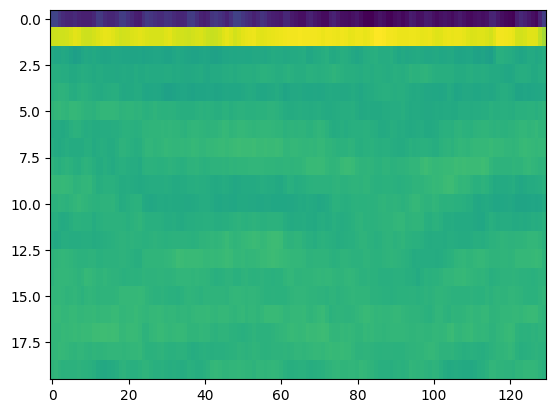

In [17]:
example_file = "IRMAS-TrainingData/piano/[pia][cla]1291__1.wav"
mfcc = get_mfcc(example_file)
plt.imshow(mfcc, interpolation='nearest', aspect='auto')
plt.show()

In [2]:
def get_melspectrogram(wav_file):
    y, sr = librosa.load(wav_file, offset=0, duration=30)
    melspectrogram = np.array(librosa.feature.melspectrogram(y=y, sr=sr))
    return melspectrogram

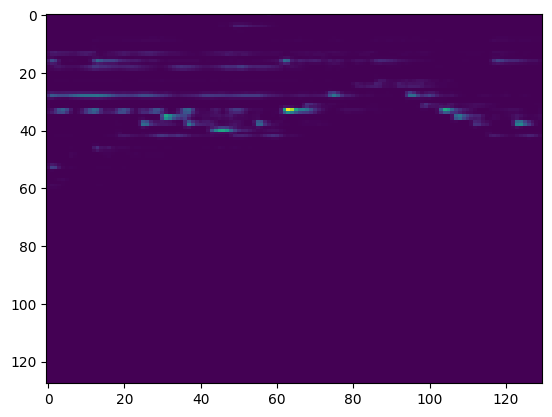

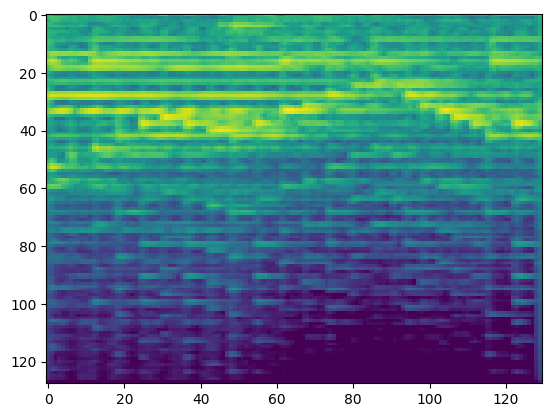

In [19]:
S = get_melspectrogram(example_file)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.imshow(S, interpolation='nearest', aspect='auto')
plt.show()
plt.imshow(S_dB, interpolation='nearest', aspect='auto')
plt.show()

In [26]:
def get_chroma_vector(wav_file):
    y, sr = librosa.load(wav_file)
    chroma = np.array(librosa.feature.chroma_stft(y=y, sr=sr))
    return chroma

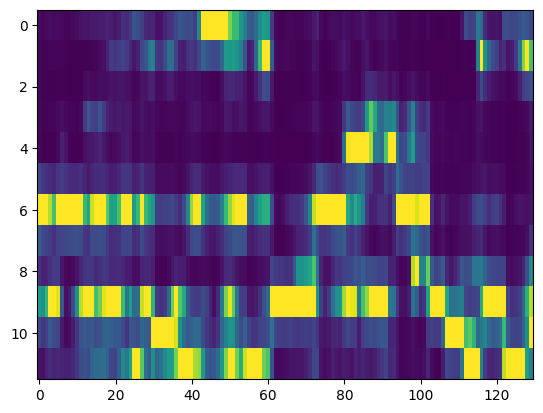

In [21]:
chroma = get_chroma_vector(example_file)
plt.imshow(chroma, interpolation='nearest', aspect='auto')
plt.show()

In [13]:
def get_tonnetz(wav_file):
    y, sr = librosa.load(wav_file)
    tonnetz = np.array(librosa.feature.tonnetz(y=y, sr=sr))
    return tonnetz

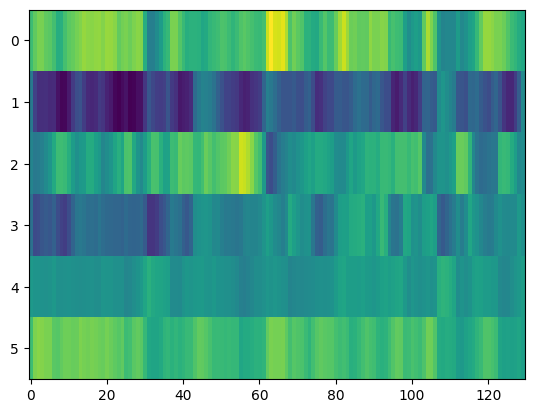

In [23]:
ton = get_tonnetz(example_file)
plt.imshow(ton , interpolation='nearest', aspect='auto')
plt.show()

In [41]:
def get_feature(wav_file):
    # Extracting MFCC feature
    mfcc = get_mfcc(wav_file)
    mfcc_mean = mfcc.mean(axis=1)
    mfcc_min = mfcc.min(axis=1)
    mfcc_max = mfcc.max(axis=1)
    mfcc_feature = np.concatenate( (mfcc_mean, mfcc_min, mfcc_max) )

    # Extracting Mel Spectrogram feature
    melspectrogram = get_melspectrogram(wav_file)
    melspectrogram_mean = melspectrogram.mean(axis=1)
    melspectrogram_min = melspectrogram.min(axis=1)
    melspectrogram_max = melspectrogram.max(axis=1)
    melspectrogram_feature = np.concatenate( (melspectrogram_mean, melspectrogram_min, melspectrogram_max) )

    # Extracting chroma vector feature
    chroma = get_chroma_vector(wav_file)
    chroma_mean = chroma.mean(axis=1)
    chroma_min = chroma.min(axis=1)
    chroma_max = chroma.max(axis=1)
    chroma_feature = np.concatenate( (chroma_mean, chroma_min, chroma_max) )

    # Extracting tonnetz feature
    tntz = get_tonnetz(wav_file)
    tntz_mean = tntz.mean(axis=1)
    tntz_min = tntz.min(axis=1)
    tntz_max = tntz.max(axis=1)
    tntz_feature = np.concatenate( (tntz_mean, tntz_min, tntz_max) ) 

    feature = np.concatenate((chroma_feature, melspectrogram_feature, mfcc_feature, tntz_feature)).tolist()
    return feature

In [42]:
def features_preprocessing(data_dir, labels):
    df = pd.DataFrame()
    for label in labels:
        label_path = os.path.join(data_dir, label)
        for file in os.listdir(label_path):
            if file.endswith('.wav'):
                file_path = os.path.join(label_path, file)
                df_new = pd.DataFrame(data=[[str(get_feature(file_path)),label]], columns=['features', 'label'])
                df = pd.concat([df, df_new], ignore_index=True)
        print(f"{label} features extracted")
    
    return df

In [43]:
df_features_piano_violin = features_preprocessing(data_dir, labels)

piano features extracted
violin features extracted


In [44]:
df_features_piano_violin

,features,label
0,"[0.14603902399539948, 0.27062007784843445, 0.2...",piano
1,"[0.156730055809021, 0.41157811880111694, 0.103...",piano
2,"[0.08373783528804779, 0.2565391957759857, 0.49...",piano
3,"[0.08121258020401001, 0.43151411414146423, 0.5...",piano
4,"[0.2748226225376129, 0.16683275997638702, 0.32...",piano
...,...,...
1296,"[0.12602674961090088, 0.21464774012565613, 0.3...",violin
1297,"[0.12183570861816406, 0.25019922852516174, 0.3...",violin
1298,"[0.4647538363933563, 0.38563960790634155, 0.30...",violin
1299,"[0.3844096064567566, 0.16711150109767914, 0.20...",violin


In [3]:
def features_df(df):
    data = pd.DataFrame()
    for index in range(df.shape[0]):
        data = pd.concat([data, pd.DataFrame([float(feature.strip().replace('[','').replace(']','')) for feature in df.iloc[index,0].split(',')] + [df.iloc[index,1]]).transpose()])
        data.index = range(data.shape[0])
    data.columns = [*data.columns[:-1], 'label']
    return data

In [52]:
f_df = features_df(df_features_piano_violin)

In [53]:
f_df

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,493,494,495,496,497,label
0,0.146039,0.27062,0.206998,0.068933,0.145684,0.478172,0.620587,0.151888,0.110069,0.067262,...,-0.491034,-0.183545,-0.058871,0.307642,0.049536,0.088551,0.054788,0.029104,0.274893,piano
1,0.15673,0.411578,0.103845,0.08678,0.18451,0.329386,0.653857,0.147476,0.113138,0.19681,...,-0.287256,-0.059908,-0.00174,0.445428,0.008805,-0.000443,0.18649,0.12557,0.312911,piano
2,0.083738,0.256539,0.494353,0.220812,0.192806,0.195937,0.728249,0.211639,0.282137,0.487323,...,-0.467222,-0.20049,0.013295,0.471022,0.046238,-0.015125,-0.08884,-0.013635,0.205797,piano
3,0.081213,0.431514,0.514514,0.222382,0.50663,0.299356,0.076805,0.166818,0.112405,0.257505,...,-0.259162,-0.129608,-0.072471,0.255265,0.144423,0.019124,0.136217,0.064613,0.048277,piano
4,0.274823,0.166833,0.322676,0.141618,0.302088,0.311491,0.163452,0.364811,0.115007,0.173331,...,-0.420747,-0.152744,-0.120638,0.262364,0.324099,0.190742,0.171184,0.084667,0.117735,piano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,0.126027,0.214648,0.354138,0.452065,0.358604,0.223432,0.313123,0.541337,0.197879,0.104032,...,-0.253317,-0.11092,-0.099919,0.243271,0.208257,0.447049,0.128943,0.086873,0.066169,violin
1297,0.121836,0.250199,0.345136,0.274045,0.335389,0.174393,0.289875,0.6803,0.259521,0.212495,...,-0.256988,-0.117264,-0.106923,0.244277,0.255613,0.371566,0.134526,0.088803,0.066207,violin
1298,0.464754,0.38564,0.300967,0.221669,0.383031,0.358045,0.285354,0.518816,0.425253,0.240512,...,-0.060478,-0.040007,-0.101518,0.124352,0.241336,0.099298,0.208113,0.085718,0.075582,violin
1299,0.38441,0.167112,0.209754,0.37701,0.356945,0.439576,0.427315,0.318178,0.515821,0.401655,...,-0.153372,-0.071101,-0.066756,0.088907,0.096589,0.193919,0.14588,0.017334,0.079583,violin


In [54]:
f_df.to_csv('data_features_piano_violin.csv',index=False)

In [55]:
labels = ['piano', 'violin', 'acoustic_guitar', 'cello']
df_features_all = features_preprocessing(data_dir, labels)

piano features extracted
violin features extracted
acoustic_guitar features extracted
cello features extracted


In [56]:
df_features_all

,features,label
0,"[0.14603902399539948, 0.27062007784843445, 0.2...",piano
1,"[0.156730055809021, 0.41157811880111694, 0.103...",piano
2,"[0.08373783528804779, 0.2565391957759857, 0.49...",piano
3,"[0.08121258020401001, 0.43151411414146423, 0.5...",piano
4,"[0.2748226225376129, 0.16683275997638702, 0.32...",piano
...,...,...
2321,"[0.4486047923564911, 0.39332133531570435, 0.42...",cello
2322,"[0.2836451530456543, 0.279927521944046, 0.5258...",cello
2323,"[0.21937161684036255, 0.2270798683166504, 0.33...",cello
2324,"[0.3247653543949127, 0.49299538135528564, 0.58...",cello


In [57]:
f_all_df = features_df(df_features_all)

In [58]:
f_all_df

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,493,494,495,496,497,label
0,0.146039,0.27062,0.206998,0.068933,0.145684,0.478172,0.620587,0.151888,0.110069,0.067262,...,-0.491034,-0.183545,-0.058871,0.307642,0.049536,0.088551,0.054788,0.029104,0.274893,piano
1,0.15673,0.411578,0.103845,0.08678,0.18451,0.329386,0.653857,0.147476,0.113138,0.19681,...,-0.287256,-0.059908,-0.00174,0.445428,0.008805,-0.000443,0.18649,0.12557,0.312911,piano
2,0.083738,0.256539,0.494353,0.220812,0.192806,0.195937,0.728249,0.211639,0.282137,0.487323,...,-0.467222,-0.20049,0.013295,0.471022,0.046238,-0.015125,-0.08884,-0.013635,0.205797,piano
3,0.081213,0.431514,0.514514,0.222382,0.50663,0.299356,0.076805,0.166818,0.112405,0.257505,...,-0.259162,-0.129608,-0.072471,0.255265,0.144423,0.019124,0.136217,0.064613,0.048277,piano
4,0.274823,0.166833,0.322676,0.141618,0.302088,0.311491,0.163452,0.364811,0.115007,0.173331,...,-0.420747,-0.152744,-0.120638,0.262364,0.324099,0.190742,0.171184,0.084667,0.117735,piano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,0.448605,0.393321,0.423758,0.248883,0.238452,0.310431,0.447599,0.803794,0.335575,0.200278,...,-0.285975,-0.063258,-0.121067,0.142681,0.29411,0.297698,0.338768,0.104941,0.121138,cello
2322,0.283645,0.279928,0.525818,0.381589,0.304869,0.306851,0.541126,0.635699,0.401358,0.352164,...,-0.266017,-0.171541,-0.115205,0.263676,0.279879,0.316623,0.078611,0.038313,0.049217,cello
2323,0.219372,0.22708,0.333095,0.318186,0.505719,0.346666,0.173662,0.350025,0.255114,0.398792,...,-0.243557,-0.241606,-0.115329,0.510534,0.472715,0.202183,0.3341,0.063765,0.141306,cello
2324,0.324765,0.492995,0.588606,0.460126,0.598704,0.44285,0.320254,0.321619,0.365118,0.615365,...,-0.332869,-0.255287,-0.12793,0.569592,0.447982,0.086115,0.181318,0.017261,0.083751,cello


In [59]:
f_all_df.to_csv('data_features.csv',index=False)

In [24]:
def get_feature_spectr(wav_file):
    # Extracting MFCC feature
    # mfcc = get_mfcc(wav_file)
    # mfcc_mean = mfcc.mean(axis=1)
    # mfcc_min = mfcc.min(axis=1)
    # mfcc_max = mfcc.max(axis=1)
    # mfcc_feature = np.concatenate( (mfcc_mean, mfcc_min, mfcc_max) )

    # Extracting Mel Spectrogram feature
    melspectrogram = get_melspectrogram(wav_file)
    melspectrogram_mean = melspectrogram.mean(axis=1)
    melspectrogram_min = melspectrogram.min(axis=1)
    melspectrogram_max = melspectrogram.max(axis=1)
    melspectrogram_feature = np.concatenate( (melspectrogram_mean, melspectrogram_min, melspectrogram_max) )

    # Extracting chroma vector feature
    chroma = get_chroma_vector(wav_file)
    chroma_mean = chroma.mean(axis=1)
    chroma_min = chroma.min(axis=1)
    chroma_max = chroma.max(axis=1)
    chroma_feature = np.concatenate( (chroma_mean, chroma_min, chroma_max) )

    # Extracting tonnetz feature
    tntz = get_tonnetz(wav_file)
    tntz_mean = tntz.mean(axis=1)
    tntz_min = tntz.min(axis=1)
    tntz_max = tntz.max(axis=1)
    tntz_feature = np.concatenate( (tntz_mean, tntz_min, tntz_max) ) 

    # feature = np.concatenate((chroma_feature, melspectrogram_feature, mfcc_feature, tntz_feature)).tolist()
    feature = np.concatenate((chroma_feature, melspectrogram_feature, tntz_feature)).tolist()
    return feature

In [28]:
def spectr_features_preprocessing(data_dir, labels):
    df = pd.DataFrame()
    for label in labels:
        label_path = os.path.join(data_dir, label)
        for file in os.listdir(label_path):
            if file.endswith('.wav'):
                file_path = os.path.join(label_path, file)
                df_new = pd.DataFrame(data=[[str(get_feature_spectr(file_path)),label]], columns=['features', 'label'])
                df = pd.concat([df, df_new], ignore_index=True)
        print(f"{label} features extracted")
    
    return df

In [29]:
labels = ['piano', 'violin', 'acoustic_guitar', 'cello']
data_dir = 'IRMAS-TrainingData'
df_features_spectr_all = spectr_features_preprocessing(data_dir, labels)

piano features extracted
violin features extracted
acoustic_guitar features extracted
cello features extracted


In [30]:
features_df(df_features_spectr_all).to_csv('data_features_spectrogram_3.csv',index=False)

In [27]:
# example_file = "IRMAS-TrainingData/piano/[pia][cla]1291__1.wav"
# x = get_feature_spectr(example_file)